# 1) Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys, datetime, re , glob
from os import listdir
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2) Include the directory where CIV Training data from Gfk is present

In [2]:
data_path ="D:\IBM_B2B_C_Onboarding\CIV_Training_Data_from_GfK"
filenames = os.listdir(data_path)
# print(filenames)

# 3) Load the Ontology Schema Catalog Data

In [3]:
df_ontology_schema_catalog = pd.read_excel(data_path +"/" +"Ontology_Schema_Catalog_Data.xlsx")
df_ontology_schema_catalog

,/Ontology Schema Primary Spec/ID,/Ontology Schema Primary Spec/UNSPSC,/Ontology Schema Primary Spec/UNSPSC Category Name,/Ontology Schema Primary Spec/CategoryID,/Ontology Schema Primary Spec/Categoryname,/Ontology Schema Primary Spec/AttributeID,/Ontology Schema Primary Spec/Attributename,/Ontology Schema Primary Spec/AttributeDefinition,/Ontology Schema Primary Spec/MaxCharacterLength,/Ontology Schema Primary Spec/isrepeatable,/Ontology Schema Primary Spec/DataType,/Ontology Schema Primary Spec/Attribute Condition,/Ontology Schema Lkp Spec/UoM,/Ontology Schema Lkp Spec/Unit
0,1,43222612,Network switches,4799,Switches & Bridges,111131521,GDPR Risk,GDPR Risk. This attribute was created to spec...,254,Yes,STRING,Optional,No,NaN
1,2,43222612,Network switches,4799,Switches & Bridges,11477,Features,A distinctive aspect of blender.,254,Yes,STRING,Optional,No,NaN
2,3,43222612,Network switches,4799,Switches & Bridges,111118964,Total Number of Network Ports,Total number of Network Ports supported by dev...,50,No,NUMBER,Required,No,NaN
3,4,43222612,Network switches,4799,Switches & Bridges,111116430,Network _RJ-45_,The availability of RJ-45 port (ethrernet) is ...,254,No,STRING,Optional,No,NaN
4,5,43222612,Network switches,4799,Switches & Bridges,111118830,Uplink Port,Uplink ports is use to allow the switch to con...,254,No,STRING,Required,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86058,86059,43211511,Wearable computing devices,11892,Smartwatches,111120829,Watch Case Diameter,It refers to the diameter of the case enclosin...,50,No,NUMBER,Optional,Yes,mm
86059,86060,43211511,Wearable computing devices,11892,Smartwatches,1975,Weight (Approximate),Please extract in Maximum Weight parameter in ...,50,No,NUMBER,Optional,Yes,g
86060,86061,43211511,Wearable computing devices,11892,Smartwatches,129,Application or Usage,Attribute contains the info of functions which...,254,Yes,STRING,Optional,No,NaN
86061,86062,43211511,Wearable computing devices,11892,Smartwatches,11418,Durability,The ability to endure.Describes objects relati...,254,Yes,STRING,Required,No,NaN


In [4]:
df_ontology_schema_catalog.columns

Index(['/Ontology Schema Primary Spec/ID',
       '/Ontology Schema Primary Spec/UNSPSC',
       '/Ontology Schema Primary Spec/UNSPSC Category Name',
       '/Ontology Schema Primary Spec/CategoryID',
       '/Ontology Schema Primary Spec/Categoryname',
       '/Ontology Schema Primary Spec/AttributeID',
       '/Ontology Schema Primary Spec/Attributename',
       '/Ontology Schema Primary Spec/AttributeDefinition',
       '/Ontology Schema Primary Spec/MaxCharacterLength',
       '/Ontology Schema Primary Spec/isrepeatable',
       '/Ontology Schema Primary Spec/DataType',
       '/Ontology Schema Primary Spec/Attribute Condition',
       '/Ontology Schema Lkp Spec/UoM', '/Ontology Schema Lkp Spec/Unit'],
      dtype='object')

## 3.1) Counting the values of each UNSPSC

In [5]:
df_ontology_schema_catalog['/Ontology Schema Primary Spec/UNSPSC'].unique()

array([43222612, 43201602, 43222610, ..., 53131628, 53131602, 43211511],
      dtype=int64)

In [6]:
df_ontology_schema_catalog['/Ontology Schema Primary Spec/UNSPSC'].value_counts()

52141504    193
44102405    172
47111502    163
47111501    163
52141545    141
           ... 
44101703      7
44103121      7
39121528      7
44103104      7
44101724      6
Name: /Ontology Schema Primary Spec/UNSPSC, Length: 2260, dtype: int64

In [7]:
df_ontology_schema_catalog['/Ontology Schema Primary Spec/UNSPSC'].value_counts().loc[lambda x : x>100] 

52141504    193
44102405    172
47111502    163
47111501    163
52141545    141
43211503    140
43222634    132
43211513    130
43211507    126
43201558    125
43201557    125
25161503    125
40101701    124
60141010    116
44111911    113
47111503    112
43211501    109
48101615    109
43211509    107
52161557    107
45101512    102
43212113    102
43212103    102
43212108    102
43201544    101
Name: /Ontology Schema Primary Spec/UNSPSC, dtype: int64

In [8]:
print(df_ontology_schema_catalog.shape)
print(df_ontology_schema_catalog.size)

(86063, 14)
1204882


# 4) Load the Gfk files

## 4.1) Load the gfk file "GFKProducts_000_2023_02_28_16_33_50.csv"

In [9]:
df_gfkproducts_000 = pd.read_csv(data_path +"/" +"GFKProducts_000_2023_02_28_16_33_50.csv",delimiter=',', on_bad_lines='skip')
df_gfkproducts_000

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Desktop Usability,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11812045,"Lexmark International, Inc",15R0146,http://www.lexmark.com,Lexmark,15R0146,1000 Sheets Drawer For W840 Printer,<p>Genuine Lexmark supplies and Lexmark printe...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11746061,HP Inc.,C9734B,http://www.hp.com,HP,NaN,C9734B Laser Transfer Kit,<p>Image transfer kit is designed for use with...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1038429108,Western Digital Corporation,WD30EZRX,http://www.wdc.com,WD,WD30EZRX,Green WD30EZRX Hard Drive,<p><b>WD GREEN&trade;</b><br><b>Capacity Stora...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,1039042417,HP Inc.,T6N30AA,http://www.hp.com,HP,L7010t,L7010t 10.1 in Retail Touch Monitor,"<p>Deliver an enhanced, personalized service e...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,1039050679,Kingston Technology Company,HX426C16FW/16,http://www.kingston.com,Kingston,NaN,HyperX Fury 16GB DDR4 SDRAM Memory Module,<b>Automatic overclocking up to 2666MHz.<br />...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,1038674279,Lenovo Group Limited,4XB0K12357,http://www.lenovo.com/us/en/,Lenovo,NaN,"LTS 2.5"" 240GB PM863a Enterprise Entry SATA 6G...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_gfkproducts_000.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Desktop Usability', 'Label Height Supported', 'Label Width Supported',
       'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity'],
      dtype='object', length=1296)

In [11]:
print(df_gfkproducts_000.shape)
print(df_gfkproducts_000.size)

(10000, 1296)
12960000


## 4.2) Load the gfk file "GFKProducts_001_2023_02_28_16_33_50.csv"

In [12]:
df_gfkproducts_001 = pd.read_csv(data_path +"/" +"GFKProducts_001_2023_02_28_16_33_50.csv",delimiter=',',on_bad_lines='skip')
df_gfkproducts_001

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Desktop Usability,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity
0,1038727308,Toshiba,PX1878E-1NCA,http://www.toshiba.com,Toshiba,NaN,"Ultra Mobile Carry Case (14"") - Toploader",<p>Made for your working life</p><p>Whether yo...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1038440349,Hewlett Packard Enterprise,873012-B21,http://www.hpe.com,HPE,NaN,Hard Drive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1038731672,Epson Corporation,C11CC12001BT,http://www.epson.com,Epson,AL-C500DXN,WorkForce AL-C500DXN,<b>Quality at its best</b><p>A cost effective ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1038731255,Epson Corporation,C11CD73001,http://www.epson.com,Epson,AL-MX300DNF,WorkForce AL-MX300DNF Laser Multifunction Printer,<p><b>Printers & All-in-Ones</b> Epson printer...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1038440351,Hewlett Packard Enterprise,872346-B21,http://www.hpe.com,HPE,NaN,480GB SATA 6G Mixed Use LFF (3.5in) SCC 3yr Wt...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,1074438771,Esselte Corporation,55813,http://www.esselte.com,Oxford,NaN,Oxford Clear Front Report Cover,"<p>Clear, acetate front covers offer a full vi...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/2 Inch|2|Inch
3507,1074504877,Hewlett Packard Enterprise,D9Y32AA#ABA,http://www.hpe.com,HPE,NaN,UltraSlim Docking Station,<p>HP 2013 UltraSlim Docking Station<br /><br ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3508,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3509,1073571869,Port Designs,160510,http://www.portdesigns.com,Port,NaN,COURCHEVEL Backpack,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_gfkproducts_001.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Desktop Usability', 'Label Height Supported', 'Label Width Supported',
       'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity'],
      dtype='object', length=1296)

In [14]:
print(df_gfkproducts_001.shape)
print(df_gfkproducts_001.size)

(3511, 1296)
4550256


# 5) Load the ADA file

In [15]:
df_ADA = pd.read_excel(data_path +"/" +"ADA.xlsx", sheet_name="Sheet1")
df_ADA

,OWNING_CTRY_ISO_CD,CAT_END_DATE,CAT_ID,CATITEM_ID,CAT_PRDCAT_ID,CATITEMD_SHORT_DESC,CATITEMD_LONG_DESC,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,CATITEM_OEM_PART_ID,GLOBCOMM_CD,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,AE,2017-12-31,AELENINT1,06P4069,LENOINT1,MOUSE Optical Wheel Mouse,Lenovo Optical Wheel Mouse,11.0,Option; Mouse,Lenovo,06P4069,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRED_CLASS002,<NULL>,1
1,AE,2017-12-31,AELENINT1,0A36188,LENOINT1,MOUSE Lenovo Laser Wireless Mouse,Lenovo Laser Wireless Mouse,19.0,Option; Mouse,Lenovo,0A36188,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRELESS_CLASS003,<NULL>,1
2,AE,2017-12-31,AELENINT1,0A36407,LENOINT1,MOUSE ThinkPad Bluetooth Laser Mouse,Lenovo ThinkPad Laser Bluetooth Mouse,24.0,Option; Mouse,Lenovo,0A36407,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_BT_CLASS004,<NULL>,1
3,AE,2017-12-31,AELENINT1,0A65619,LENOINT1,DRIVEH USB3.0 500G HDD,ThinkPad USB 3.0 Secure Hard Drive - 500GB,122.0,NaN,Lenovo,0A65619,43201803,HDD/Portable HDD,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,EXTERNAL_HDD_CLASS002,<NULL>,1
4,AE,2017-12-31,AELENINT1,0A65621,LENOINT1,DRIVEH TP USB3.0 1TB Secure HDD,ThinkPad USB 3.0 1TB Secure Hard Drive,153.0,NaN,Lenovo,0A65621,43201803,HDD/Portable HDD,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,EXTERNAL_HDD_CLASS004,<NULL>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93013,ZM,2017-12-31,ZMLENINT1,61B1JAR1SA,LENOINT1,T2224d -21.5 Inch IPS Monitor,ThinkVision T2224d 21.5-inch LED Backlit LCD M...,112.0,Monitor; Visual,Lenovo,61B1JAR1SA,43211902,Monitors,1000346040,https://repository.lenovo.com/Prod_images/IPC/...,MONITOR_CLASS002,<NULL>,1
93014,ZM,2017-12-31,ZMLENINT1,61B7JAR6CH,LENOINT1,E24-10 23.8 inch FHD Monitor (VGA+DP),ThinkVision E24-10 23.8 inch Wide FHD In Plane...,138.0,Monitor; Visual,Lenovo,61B7JAR6CH,43211902,Monitors,1000346040,https://repository.lenovo.com/Prod_images/IPC/...,MONITOR_CLASS003,<NULL>,1
93015,ZM,2017-12-31,ZMLENINT1,61B7JAR6SA,LENOINT1,E24-10 23.8 inch FHD Monitor (VGA+DP),ThinkVision E24-10 23.8 inch Wide FHD In Plane...,138.0,Monitor; Visual,Lenovo,61B7JAR6SA,43211902,Monitors,1000346040,https://repository.lenovo.com/Prod_images/IPC/...,MONITOR_CLASS003,<NULL>,1
93016,ZM,2017-12-31,ZMLENINT1,73P2582,LENOINT1,LOCK CABLE LOCK,Kensington MicroSaver Security Cable Lock,30.0,NaN,Lenovo,73P2582,46171502,Cable Locks,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,SECURITYLOCK_CLASS001,<NULL>,1


In [16]:
df_ADA.columns

Index(['OWNING_CTRY_ISO_CD', 'CAT_END_DATE', 'CAT_ID', 'CATITEM_ID',
       'CAT_PRDCAT_ID', 'CATITEMD_SHORT_DESC', 'CATITEMD_LONG_DESC',
       'CATITEM_UPRICE_AMT', 'CATITEM_XKEYWRD_TXT', 'MFGR_ID',
       'CATITEM_OEM_PART_ID', 'GLOBCOMM_CD', 'CATEGORY', 'SUPP_ID',
       'CATITEM_PICURL_TXT', 'SPC', 'SPC_2', 'COUNTOFSPC'],
      dtype='object')

In [17]:
print(df_ADA.shape)
print(df_ADA.size)

(93018, 18)
1674324


## 5.1) Drop duplicates using columns 'MFGR_ID','CATITEM_OEM_PART_ID'

In [18]:
df_ADA = df_ADA.drop_duplicates(subset=['MFGR_ID','CATITEM_OEM_PART_ID'])
display(df_ADA)
print(df_ADA.shape)
print(df_ADA.size)

,OWNING_CTRY_ISO_CD,CAT_END_DATE,CAT_ID,CATITEM_ID,CAT_PRDCAT_ID,CATITEMD_SHORT_DESC,CATITEMD_LONG_DESC,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,CATITEM_OEM_PART_ID,GLOBCOMM_CD,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,AE,2017-12-31,AELENINT1,06P4069,LENOINT1,MOUSE Optical Wheel Mouse,Lenovo Optical Wheel Mouse,11.00,Option; Mouse,Lenovo,06P4069,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRED_CLASS002,<NULL>,1
1,AE,2017-12-31,AELENINT1,0A36188,LENOINT1,MOUSE Lenovo Laser Wireless Mouse,Lenovo Laser Wireless Mouse,19.00,Option; Mouse,Lenovo,0A36188,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRELESS_CLASS003,<NULL>,1
2,AE,2017-12-31,AELENINT1,0A36407,LENOINT1,MOUSE ThinkPad Bluetooth Laser Mouse,Lenovo ThinkPad Laser Bluetooth Mouse,24.00,Option; Mouse,Lenovo,0A36407,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_BT_CLASS004,<NULL>,1
3,AE,2017-12-31,AELENINT1,0A65619,LENOINT1,DRIVEH USB3.0 500G HDD,ThinkPad USB 3.0 Secure Hard Drive - 500GB,122.00,NaN,Lenovo,0A65619,43201803,HDD/Portable HDD,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,EXTERNAL_HDD_CLASS002,<NULL>,1
4,AE,2017-12-31,AELENINT1,0A65621,LENOINT1,DRIVEH TP USB3.0 1TB Secure HDD,ThinkPad USB 3.0 1TB Secure Hard Drive,153.00,NaN,Lenovo,0A65621,43201803,HDD/Portable HDD,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,EXTERNAL_HDD_CLASS004,<NULL>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92906,ZA,2019-01-21,EM0187KKX7,WBM1224,EM0187KKX7,Whiteboard Magnetic Alu frame 1200 x 2400,Parrot Magnetic Whiteboard Alu Frame 1200 x 2400,1711.78,EM0187KKX7; STATIONERY,Parrot,BD0976,44111911,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS016,<NULL>,1
92907,ZA,2019-01-21,EM0187KKX7,WBM1230,EM0187KKX7,Whiteboard Magnetic Alu frame 1200 x 3000,Parrot Magnetic Whiteboard Alu Frame 1200 x 3000,1984.61,EM0187KKX7; STATIONERY,Parrot,BD0984,44111905,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS016,<NULL>,1
92908,ZA,2019-01-21,EM0187KKX7,WBM6090,EM0187KKX7,Whiteboard Magnetic Alu frame 900 x 600,Parrot Magnetic Whiteboard Alu Frame 600 X 900,405.15,EM0187KKX7; STATIONERY,Parrot,1900926E,44111911,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS010,<NULL>,1
92909,ZA,2019-01-21,EM0187KKX7,WBMIO005,EM0187KKX7,WHITE BOARD ALUMINIUM FRAME MAGNETIC IN/OUT 45...,IN / OUT BOARD ALUMINIUM FRAME MAGNETIC 450X6...,1002.40,EM0187KKX7; STATIONERY,Parrot,BD4018,44111911,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/B...,WHITEBOARDS_CLASS009,<NULL>,1


(27185, 18)
489330


## 5.2) Drop the null values

In [19]:
df_ADA = df_ADA[~df_ADA['SPC'].isin(['<NULL>','NULL'])]
df_ADA.reset_index(drop = True, inplace = True)

In [20]:
display(df_ADA)
print(df_ADA.shape)
print(df_ADA.size)

,OWNING_CTRY_ISO_CD,CAT_END_DATE,CAT_ID,CATITEM_ID,CAT_PRDCAT_ID,CATITEMD_SHORT_DESC,CATITEMD_LONG_DESC,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,CATITEM_OEM_PART_ID,GLOBCOMM_CD,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,AE,2017-12-31,AELENINT1,06P4069,LENOINT1,MOUSE Optical Wheel Mouse,Lenovo Optical Wheel Mouse,11.00,Option; Mouse,Lenovo,06P4069,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRED_CLASS002,<NULL>,1
1,AE,2017-12-31,AELENINT1,0A36188,LENOINT1,MOUSE Lenovo Laser Wireless Mouse,Lenovo Laser Wireless Mouse,19.00,Option; Mouse,Lenovo,0A36188,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRELESS_CLASS003,<NULL>,1
2,AE,2017-12-31,AELENINT1,0A36407,LENOINT1,MOUSE ThinkPad Bluetooth Laser Mouse,Lenovo ThinkPad Laser Bluetooth Mouse,24.00,Option; Mouse,Lenovo,0A36407,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_BT_CLASS004,<NULL>,1
3,AE,2017-12-31,AELENINT1,0A65619,LENOINT1,DRIVEH USB3.0 500G HDD,ThinkPad USB 3.0 Secure Hard Drive - 500GB,122.00,NaN,Lenovo,0A65619,43201803,HDD/Portable HDD,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,EXTERNAL_HDD_CLASS002,<NULL>,1
4,AE,2017-12-31,AELENINT1,0A65621,LENOINT1,DRIVEH TP USB3.0 1TB Secure HDD,ThinkPad USB 3.0 1TB Secure Hard Drive,153.00,NaN,Lenovo,0A65621,43201803,HDD/Portable HDD,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,EXTERNAL_HDD_CLASS004,<NULL>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,ZA,2019-01-21,EM0187KKX7,WBM1218,EM0187KKX7,Whiteboard Magnetic Alu frame 1200 x 1800,Parrot Magnetic Whiteboard Alu Frame 1200 x 1800,1317.84,EM0187KKX7; STATIONERY,Parrot,BD0969,44111905,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS015,<NULL>,1
12963,ZA,2019-01-21,EM0187KKX7,WBM1224,EM0187KKX7,Whiteboard Magnetic Alu frame 1200 x 2400,Parrot Magnetic Whiteboard Alu Frame 1200 x 2400,1711.78,EM0187KKX7; STATIONERY,Parrot,BD0976,44111911,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS016,<NULL>,1
12964,ZA,2019-01-21,EM0187KKX7,WBM1230,EM0187KKX7,Whiteboard Magnetic Alu frame 1200 x 3000,Parrot Magnetic Whiteboard Alu Frame 1200 x 3000,1984.61,EM0187KKX7; STATIONERY,Parrot,BD0984,44111905,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS016,<NULL>,1
12965,ZA,2019-01-21,EM0187KKX7,WBM6090,EM0187KKX7,Whiteboard Magnetic Alu frame 900 x 600,Parrot Magnetic Whiteboard Alu Frame 600 X 900,405.15,EM0187KKX7; STATIONERY,Parrot,1900926E,44111911,White Boards,1000379584,http://jabatha.brandhub.co.za/images-product/W...,WHITEBOARDS_CLASS010,<NULL>,1


(12967, 18)
233406


# 6) Check all the columns in every dataframes and rename some columns

In [21]:
df_ADA.columns

Index(['OWNING_CTRY_ISO_CD', 'CAT_END_DATE', 'CAT_ID', 'CATITEM_ID',
       'CAT_PRDCAT_ID', 'CATITEMD_SHORT_DESC', 'CATITEMD_LONG_DESC',
       'CATITEM_UPRICE_AMT', 'CATITEM_XKEYWRD_TXT', 'MFGR_ID',
       'CATITEM_OEM_PART_ID', 'GLOBCOMM_CD', 'CATEGORY', 'SUPP_ID',
       'CATITEM_PICURL_TXT', 'SPC', 'SPC_2', 'COUNTOFSPC'],
      dtype='object')

In [22]:
df_ontology_schema_catalog.columns

Index(['/Ontology Schema Primary Spec/ID',
       '/Ontology Schema Primary Spec/UNSPSC',
       '/Ontology Schema Primary Spec/UNSPSC Category Name',
       '/Ontology Schema Primary Spec/CategoryID',
       '/Ontology Schema Primary Spec/Categoryname',
       '/Ontology Schema Primary Spec/AttributeID',
       '/Ontology Schema Primary Spec/Attributename',
       '/Ontology Schema Primary Spec/AttributeDefinition',
       '/Ontology Schema Primary Spec/MaxCharacterLength',
       '/Ontology Schema Primary Spec/isrepeatable',
       '/Ontology Schema Primary Spec/DataType',
       '/Ontology Schema Primary Spec/Attribute Condition',
       '/Ontology Schema Lkp Spec/UoM', '/Ontology Schema Lkp Spec/Unit'],
      dtype='object')

In [23]:
df_gfkproducts_000.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Desktop Usability', 'Label Height Supported', 'Label Width Supported',
       'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity'],
      dtype='object', length=1296)

In [24]:
df_gfkproducts_001.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Desktop Usability', 'Label Height Supported', 'Label Width Supported',
       'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity'],
      dtype='object', length=1296)

## 6.1) Rename the column names "CATITEM_OEM_PART_ID" and "GLOBCOMM_CD" in ADA file

In [25]:
df_ADA.rename(columns = {'CATITEM_OEM_PART_ID':'Manufacturer Part Number'}, inplace = True)
df_ADA.rename(columns = {'GLOBCOMM_CD':'UNSPSC'}, inplace = True)

# Rename the column name "/Ontology Schema Primary Spec/UNSPSC" in Ontology Schema Catalog
df_ontology_schema_catalog.rename(columns = {'/Ontology Schema Primary Spec/UNSPSC':'UNSPSC'}, inplace = True)

In [26]:
df_gfkproducts_000.head(1)

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Desktop Usability,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_gfkproducts_001.head(1)

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Desktop Usability,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity
0,1038727308,Toshiba,PX1878E-1NCA,http://www.toshiba.com,Toshiba,NaN,"Ultra Mobile Carry Case (14"") - Toploader",<p>Made for your working life</p><p>Whether yo...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_ADA.head(1)

,OWNING_CTRY_ISO_CD,CAT_END_DATE,CAT_ID,CATITEM_ID,CAT_PRDCAT_ID,CATITEMD_SHORT_DESC,CATITEMD_LONG_DESC,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,Manufacturer Part Number,UNSPSC,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,AE,2017-12-31,AELENINT1,06P4069,LENOINT1,MOUSE Optical Wheel Mouse,Lenovo Optical Wheel Mouse,11.0,Option; Mouse,Lenovo,06P4069,43211708,Mouse,1000346040,https://www-969.ibm.com/isc/procurement/gcf/ib...,MOUSE_WIRED_CLASS002,<NULL>,1


In [29]:
df_ontology_schema_catalog.head(1)

,/Ontology Schema Primary Spec/ID,UNSPSC,/Ontology Schema Primary Spec/UNSPSC Category Name,/Ontology Schema Primary Spec/CategoryID,/Ontology Schema Primary Spec/Categoryname,/Ontology Schema Primary Spec/AttributeID,/Ontology Schema Primary Spec/Attributename,/Ontology Schema Primary Spec/AttributeDefinition,/Ontology Schema Primary Spec/MaxCharacterLength,/Ontology Schema Primary Spec/isrepeatable,/Ontology Schema Primary Spec/DataType,/Ontology Schema Primary Spec/Attribute Condition,/Ontology Schema Lkp Spec/UoM,/Ontology Schema Lkp Spec/Unit
0,1,43222612,Network switches,4799,Switches & Bridges,111131521,GDPR Risk,GDPR Risk. This attribute was created to spec...,254,Yes,STRING,Optional,No,NaN


# 7) Concatenating the two gfk dataframes

In [30]:
df_gfkproducts = pd.concat([df_gfkproducts_000,df_gfkproducts_001],ignore_index=True,axis=0,join='inner')

In [31]:
print(df_gfkproducts_000.shape)
print(df_gfkproducts_000.size)
print(df_gfkproducts_001.shape)
print(df_gfkproducts_001.size)

(10000, 1296)
12960000
(3511, 1296)
4550256


In [32]:
print(df_gfkproducts.shape)
print(df_gfkproducts.size)

(13511, 1296)
17510256


In [33]:
df_gfkproducts.head()

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Desktop Usability,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11812045,"Lexmark International, Inc",15R0146,http://www.lexmark.com,Lexmark,15R0146,1000 Sheets Drawer For W840 Printer,<p>Genuine Lexmark supplies and Lexmark printe...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11746061,HP Inc.,C9734B,http://www.hp.com,HP,NaN,C9734B Laser Transfer Kit,<p>Image transfer kit is designed for use with...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_gfkproducts.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Desktop Usability', 'Label Height Supported', 'Label Width Supported',
       'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity'],
      dtype='object', length=1296)

In [35]:
df_ontology_schema_catalog.head()

,/Ontology Schema Primary Spec/ID,UNSPSC,/Ontology Schema Primary Spec/UNSPSC Category Name,/Ontology Schema Primary Spec/CategoryID,/Ontology Schema Primary Spec/Categoryname,/Ontology Schema Primary Spec/AttributeID,/Ontology Schema Primary Spec/Attributename,/Ontology Schema Primary Spec/AttributeDefinition,/Ontology Schema Primary Spec/MaxCharacterLength,/Ontology Schema Primary Spec/isrepeatable,/Ontology Schema Primary Spec/DataType,/Ontology Schema Primary Spec/Attribute Condition,/Ontology Schema Lkp Spec/UoM,/Ontology Schema Lkp Spec/Unit
0,1,43222612,Network switches,4799,Switches & Bridges,111131521,GDPR Risk,GDPR Risk. This attribute was created to spec...,254,Yes,STRING,Optional,No,NaN
1,2,43222612,Network switches,4799,Switches & Bridges,11477,Features,A distinctive aspect of blender.,254,Yes,STRING,Optional,No,NaN
2,3,43222612,Network switches,4799,Switches & Bridges,111118964,Total Number of Network Ports,Total number of Network Ports supported by dev...,50,No,NUMBER,Required,No,NaN
3,4,43222612,Network switches,4799,Switches & Bridges,111116430,Network _RJ-45_,The availability of RJ-45 port (ethrernet) is ...,254,No,STRING,Optional,No,NaN
4,5,43222612,Network switches,4799,Switches & Bridges,111118830,Uplink Port,Uplink ports is use to allow the switch to con...,254,No,STRING,Required,No,NaN


## 7.1) Checking for all the null values on each of the dataframes

In [36]:
df_ADA.isna().sum().to_frame().T

,OWNING_CTRY_ISO_CD,CAT_END_DATE,CAT_ID,CATITEM_ID,CAT_PRDCAT_ID,CATITEMD_SHORT_DESC,CATITEMD_LONG_DESC,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,Manufacturer Part Number,UNSPSC,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,0,0,0,0,0,14,11,0,1993,3,2,0,0,191,658,85,324,0


In [37]:
df_gfkproducts.isna().sum().to_frame().T

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Desktop Usability,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity
0,0,0,0,0,0,7228,0,2405,10449,13511,...,13510,13510,13510,13510,13510,13510,13510,13510,13510,13510


In [38]:
df_ontology_schema_catalog.isna().sum().to_frame().T

,/Ontology Schema Primary Spec/ID,UNSPSC,/Ontology Schema Primary Spec/UNSPSC Category Name,/Ontology Schema Primary Spec/CategoryID,/Ontology Schema Primary Spec/Categoryname,/Ontology Schema Primary Spec/AttributeID,/Ontology Schema Primary Spec/Attributename,/Ontology Schema Primary Spec/AttributeDefinition,/Ontology Schema Primary Spec/MaxCharacterLength,/Ontology Schema Primary Spec/isrepeatable,/Ontology Schema Primary Spec/DataType,/Ontology Schema Primary Spec/Attribute Condition,/Ontology Schema Lkp Spec/UoM,/Ontology Schema Lkp Spec/Unit
0,0,0,0,0,0,0,0,12004,0,0,0,0,0,58454


# 8) Merge the gfk_products dataframe with ADA dataframe on Manufacturer Part Number column to get the entire dataset

In [39]:
df_gfkproducts.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Desktop Usability', 'Label Height Supported', 'Label Width Supported',
       'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity'],
      dtype='object', length=1296)

In [40]:
df_ADA.columns

Index(['OWNING_CTRY_ISO_CD', 'CAT_END_DATE', 'CAT_ID', 'CATITEM_ID',
       'CAT_PRDCAT_ID', 'CATITEMD_SHORT_DESC', 'CATITEMD_LONG_DESC',
       'CATITEM_UPRICE_AMT', 'CATITEM_XKEYWRD_TXT', 'MFGR_ID',
       'Manufacturer Part Number', 'UNSPSC', 'CATEGORY', 'SUPP_ID',
       'CATITEM_PICURL_TXT', 'SPC', 'SPC_2', 'COUNTOFSPC'],
      dtype='object')

In [41]:
# Capture the secondary specs from gfk files and generate the total dataset
CIV_Data_Joined = pd.merge(df_gfkproducts,df_ADA, on =['Manufacturer Part Number'], how ='left')
CIV_Data_Joined

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC_x,...,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,UNSPSC_y,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,NaN,...,324.67,0616a208008002006blackBlkcartridgecartridgesHP...,Hewlett Packard,44103103.0,Toner Ink Cartridge,1000189817,https://order.staplesadvantage.co.uk/peo2/Easy...,TONER_INK_CARTRIDGE_CLASS353,<NULL>,1.0
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,NaN,...,311.19,Lenovo;Simple-Swap;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I01/I0119...,INTERNAL_HDD_CLASS001,<NULL>,1.0
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,NaN,...,298.52,Lenovo;Hard;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I97/I9787...,INTERNAL_HDD_CLASS002,<NULL>,1.0
3,11812045,"Lexmark International, Inc",15R0146,http://www.lexmark.com,Lexmark,15R0146,1000 Sheets Drawer For W840 Printer,<p>Genuine Lexmark supplies and Lexmark printe...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11746061,HP Inc.,C9734B,http://www.hp.com,HP,NaN,C9734B Laser Transfer Kit,<p>Image transfer kit is designed for use with...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13704,1074438771,Esselte Corporation,55813,http://www.esselte.com,Oxford,NaN,Oxford Clear Front Report Cover,"<p>Clear, acetate front covers offer a full vi...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13705,1074504877,Hewlett Packard Enterprise,D9Y32AA#ABA,http://www.hpe.com,HPE,NaN,UltraSlim Docking Station,<p>HP 2013 UltraSlim Docking Station<br /><br ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13706,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,NaN,...,137.68,ASMCOS ADATA ASX8000NPC-256GM-C,Adata Technology Co. Ltd,43201830.0,SSD,1000003309,http://catalogue2.asmtech.com/ASM/Noimage.jpg,INTERNAL_SSD_CLASS002,<NULL>,1.0
13707,1073571869,Port Designs,160510,http://www.portdesigns.com,Port,NaN,COURCHEVEL Backpack,NaN,NaN,NaN,...,39.06,ASMCOS Port Designs 160510,Port,53121706.0,Notebook Bags,1000003309,http://mediapool.getthespec.com/m=Kw1%2bZ2Z7Jk...,LPTP_BAGS_CLASS0002,<NULL>,0.0


In [42]:
print(CIV_Data_Joined.shape)
print(CIV_Data_Joined.size)

(13709, 1313)
17999917


In [43]:
CIV_Data_Joined.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin',
       'UNSPSC_x',
       ...
       'CATITEM_UPRICE_AMT', 'CATITEM_XKEYWRD_TXT', 'MFGR_ID', 'UNSPSC_y',
       'CATEGORY', 'SUPP_ID', 'CATITEM_PICURL_TXT', 'SPC', 'SPC_2',
       'COUNTOFSPC'],
      dtype='object', length=1313)

In [44]:
CIV_Data_Joined

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC_x,...,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,UNSPSC_y,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,NaN,...,324.67,0616a208008002006blackBlkcartridgecartridgesHP...,Hewlett Packard,44103103.0,Toner Ink Cartridge,1000189817,https://order.staplesadvantage.co.uk/peo2/Easy...,TONER_INK_CARTRIDGE_CLASS353,<NULL>,1.0
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,NaN,...,311.19,Lenovo;Simple-Swap;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I01/I0119...,INTERNAL_HDD_CLASS001,<NULL>,1.0
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,NaN,...,298.52,Lenovo;Hard;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I97/I9787...,INTERNAL_HDD_CLASS002,<NULL>,1.0
3,11812045,"Lexmark International, Inc",15R0146,http://www.lexmark.com,Lexmark,15R0146,1000 Sheets Drawer For W840 Printer,<p>Genuine Lexmark supplies and Lexmark printe...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11746061,HP Inc.,C9734B,http://www.hp.com,HP,NaN,C9734B Laser Transfer Kit,<p>Image transfer kit is designed for use with...,JP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13704,1074438771,Esselte Corporation,55813,http://www.esselte.com,Oxford,NaN,Oxford Clear Front Report Cover,"<p>Clear, acetate front covers offer a full vi...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13705,1074504877,Hewlett Packard Enterprise,D9Y32AA#ABA,http://www.hpe.com,HPE,NaN,UltraSlim Docking Station,<p>HP 2013 UltraSlim Docking Station<br /><br ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13706,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,NaN,...,137.68,ASMCOS ADATA ASX8000NPC-256GM-C,Adata Technology Co. Ltd,43201830.0,SSD,1000003309,http://catalogue2.asmtech.com/ASM/Noimage.jpg,INTERNAL_SSD_CLASS002,<NULL>,1.0
13707,1073571869,Port Designs,160510,http://www.portdesigns.com,Port,NaN,COURCHEVEL Backpack,NaN,NaN,NaN,...,39.06,ASMCOS Port Designs 160510,Port,53121706.0,Notebook Bags,1000003309,http://mediapool.getthespec.com/m=Kw1%2bZ2Z7Jk...,LPTP_BAGS_CLASS0002,<NULL>,0.0


## 8.1) Drop duplicates from the merged dataframe

In [45]:
print(CIV_Data_Joined.shape)
print(CIV_Data_Joined.size)
CIV_Data_Joined.drop_duplicates(inplace = True)
CIV_Data_Joined.reset_index(drop = True, inplace = True)
print(CIV_Data_Joined.shape)
print(CIV_Data_Joined.size)

# Ignore the null values of SPC
CIV_Data_Joined = CIV_Data_Joined[~CIV_Data_Joined['SPC'].isna()]
print(CIV_Data_Joined.shape)
print(CIV_Data_Joined.size)

(13709, 1313)
17999917
(13709, 1313)
17999917
(7010, 1313)
9204130


In [46]:
display(CIV_Data_Joined)

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC_x,...,CATITEM_UPRICE_AMT,CATITEM_XKEYWRD_TXT,MFGR_ID,UNSPSC_y,CATEGORY,SUPP_ID,CATITEM_PICURL_TXT,SPC,SPC_2,COUNTOFSPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,NaN,...,324.67,0616a208008002006blackBlkcartridgecartridgesHP...,Hewlett Packard,44103103.0,Toner Ink Cartridge,1000189817,https://order.staplesadvantage.co.uk/peo2/Easy...,TONER_INK_CARTRIDGE_CLASS353,<NULL>,1.0
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,NaN,...,311.19,Lenovo;Simple-Swap;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I01/I0119...,INTERNAL_HDD_CLASS001,<NULL>,1.0
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,NaN,...,298.52,Lenovo;Hard;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I97/I9787...,INTERNAL_HDD_CLASS002,<NULL>,1.0
6,11728466,"Lexmark International, Inc",C500H2CG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,NaN,...,132.27,0c500h2yg6503045C500Cartridgestonersx500x502;1...,Lexmark,44103103.0,Toner Ink Cartridge,1000003839,https://order.staplesadvantage.co.uk/peo2/Easy...,TONER_INK_CARTRIDGE_CLASS600,<NULL>,1.0
7,11726120,"Lexmark International, Inc",C500H2YG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,NaN,...,133.48,0c500h2yg7377244C500Cartridgestonersx500x502;1...,Lexmark,44103103.0,Toner Ink Cartridge,1000003839,https://order.staplesadvantage.co.uk/peo2/Easy...,TONER_INK_CARTRIDGE_CLASS600,<NULL>,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13696,1074509780,"Cisco Systems, Inc",UCS-HD18TB10KS4K=,http://www.cisco.com,Cisco,NaN,Hard Drive,NaN,NaN,NaN,...,634.08,Hardware; Opslag; Geheugen; Harde; Schijven; S...,Cisco,43201803.0,HDD/Portable HDD,1000060026,https://img.misco.eu/resources/images/products...,INTERNAL_HDD_CLASS011,<NULL>,1.0
13697,1074508085,"Cisco Systems, Inc",UCS-HD12TB10K12G=,http://www.cisco.com,Cisco,NaN,1.2 TB 12G SAS 10K RPM SFF HDD,NaN,NaN,NaN,...,289.91,Hardware; Opslag; Geheugen; Harde; Schijven; S...,Cisco,43201803.0,HDD/Portable HDD,1000060026,https://img.misco.eu/resources/images/products...,INTERNAL_HDD_CLASS011,<NULL>,1.0
13699,1073421879,Lenovo Group Limited,81Y9691,http://www.lenovo.com/us/en/,Lenovo,NaN,7200 rpm SAS 2.5-inch SFF Slim-Hot-Swap Hard D...,NaN,NaN,NaN,...,412.51,Lenovo;Hard;,Lenovo,43201803.0,HDD/Portable HDD,1000194055,https://www.content.shi.com/products/I01/I0119...,INTERNAL_HDD_CLASS010,<NULL>,1.0
13706,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,NaN,...,137.68,ASMCOS ADATA ASX8000NPC-256GM-C,Adata Technology Co. Ltd,43201830.0,SSD,1000003309,http://catalogue2.asmtech.com/ASM/Noimage.jpg,INTERNAL_SSD_CLASS002,<NULL>,1.0


# 9) Load the CIV Data Joined excel file

In [47]:
CIV_Data = pd.read_excel(data_path +"/" +"CIV_Data_Joined.xlsx", sheet_name="Sheet1")
CIV_Data

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS353
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS001
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS002
3,11728466,"Lexmark International, Inc",C500H2CG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
4,11726120,"Lexmark International, Inc",C500H2YG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,1074509780,"Cisco Systems, Inc",UCS-HD18TB10KS4K=,http://www.cisco.com,Cisco,NaN,Hard Drive,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS011
6831,1074508085,"Cisco Systems, Inc",UCS-HD12TB10K12G=,http://www.cisco.com,Cisco,NaN,1.2 TB 12G SAS 10K RPM SFF HDD,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS011
6832,1073421879,Lenovo Group Limited,81Y9691,http://www.lenovo.com/us/en/,Lenovo,NaN,7200 rpm SAS 2.5-inch SFF Slim-Hot-Swap Hard D...,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS010
6833,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,43201830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_SSD_CLASS002


In [48]:
CIV_Data.columns

Index(['ProductID', 'Manufacturer', 'Manufacturer Part Number',
       'Manufacturer Website Address', 'Brand Name', 'Product Model',
       'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC',
       ...
       'Label Height Supported', 'Label Width Supported', 'Photo Printing',
       'Energy Consumption per Year (till 28th February 2021)',
       'Off-Mode Power Consumption (till 28th February 2021)',
       'Energy Efficiency Class (till 28th February 2021)',
       'Frequency (Horizontal/Vertical)', 'Hard Drive Configuration',
       'Fastener Capacity', 'SPC'],
      dtype='object', length=1297)

In [49]:
print(CIV_Data.shape)
print(CIV_Data.size)

(6835, 1297)
8864995


In [50]:
CIV_Data.duplicated(subset=None)

0       False
1       False
2       False
3       False
4       False
        ...  
6830    False
6831    False
6832    False
6833    False
6834    False
Length: 6835, dtype: bool

# 10) Count of UNSPSCs (Volumetric Stats)

In [51]:
CIV_Data.groupby(by=['UNSPSC'],sort=True).count()

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UPC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
UNSPSC,,,,,,,,,,,,,,,,,,,,,
14111514,61,61,61,61,61,3,61,57,51,48,...,0,0,0,0,0,0,0,0,0,61
24030502,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
24040301,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
26111710,48,48,48,48,48,29,48,41,38,48,...,0,0,0,0,0,0,0,0,0,48
32101601,25,25,25,25,25,2,25,20,0,22,...,0,0,0,0,0,0,0,0,0,25
32101621,90,90,90,90,90,4,90,57,2,85,...,0,0,0,0,0,0,0,0,0,90
32101622,19,19,19,19,19,2,19,18,1,15,...,0,0,0,0,0,0,0,0,0,19
41111604,17,17,17,17,17,1,17,16,8,16,...,0,0,0,0,0,0,0,0,0,17
43171904,15,15,15,15,15,1,15,4,0,11,...,0,0,0,0,0,0,0,0,0,15


In [52]:
CIV_Data['UNSPSC'].value_counts(sort=True)

43201803    2216
43211902     748
44103103     524
43211706     508
43211708     470
53121706     252
45111609     225
43172401     203
43201830     170
43212110     129
43201824     123
44122003     119
43212105     111
43191609     109
32101621      90
43173613      87
43211602      71
14111514      61
26111710      48
43211903      44
44121618      40
43211619      38
45111614      37
45121520      34
43201402      33
32101601      25
44111905      25
44101801      19
43172314      19
32101622      19
43201827      19
44121615      18
43201818      17
41111604      17
43171904      15
43212104      14
43201810      14
44121804      13
43172402      13
43202005      13
44122106      12
44101809      12
44121619      11
44121801       9
43201808       7
43202003       7
43202206       5
45111616       4
43201811       3
46171502       3
44121611       3
43201809       2
44111911       2
24040301       1
44121805       1
24030502       1
43181602       1
43211904       1
Name: UNSPSC, 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '43201803'),
  Text(1, 0, '43211902'),
  Text(2, 0, '44103103'),
  Text(3, 0, '43211706'),
  Text(4, 0, '43211708'),
  Text(5, 0, '53121706'),
  Text(6, 0, '45111609'),
  Text(7, 0, '43172401'),
  Text(8, 0, '43201830'),
  Text(9, 0, '43212110'),
  Text(10, 0, '43201824'),
  Text(11, 0, '44122003'),
  Text(12, 0, '43212105'),
  Text(13, 0, '43191609'),
  Text(14, 0, '32101621'),
  Text(15, 0, '43173613'),
  Text(16, 0, '43211602'),
  Text(17, 0, '14111514'),
  Text(18, 0, '26111710'),
  Text(19, 0, '43211903'),
  Text(20, 0, '44121618'),
  Text(21, 0, '43211619'),
  Text(22, 0, '45111614'),
  Text(23, 0, '45121520'),
  Text(24, 0, '43201402'),
  Text(25, 0, '32101601'),
  Text(26, 0, '44111905'),
  Text(27, 0, '

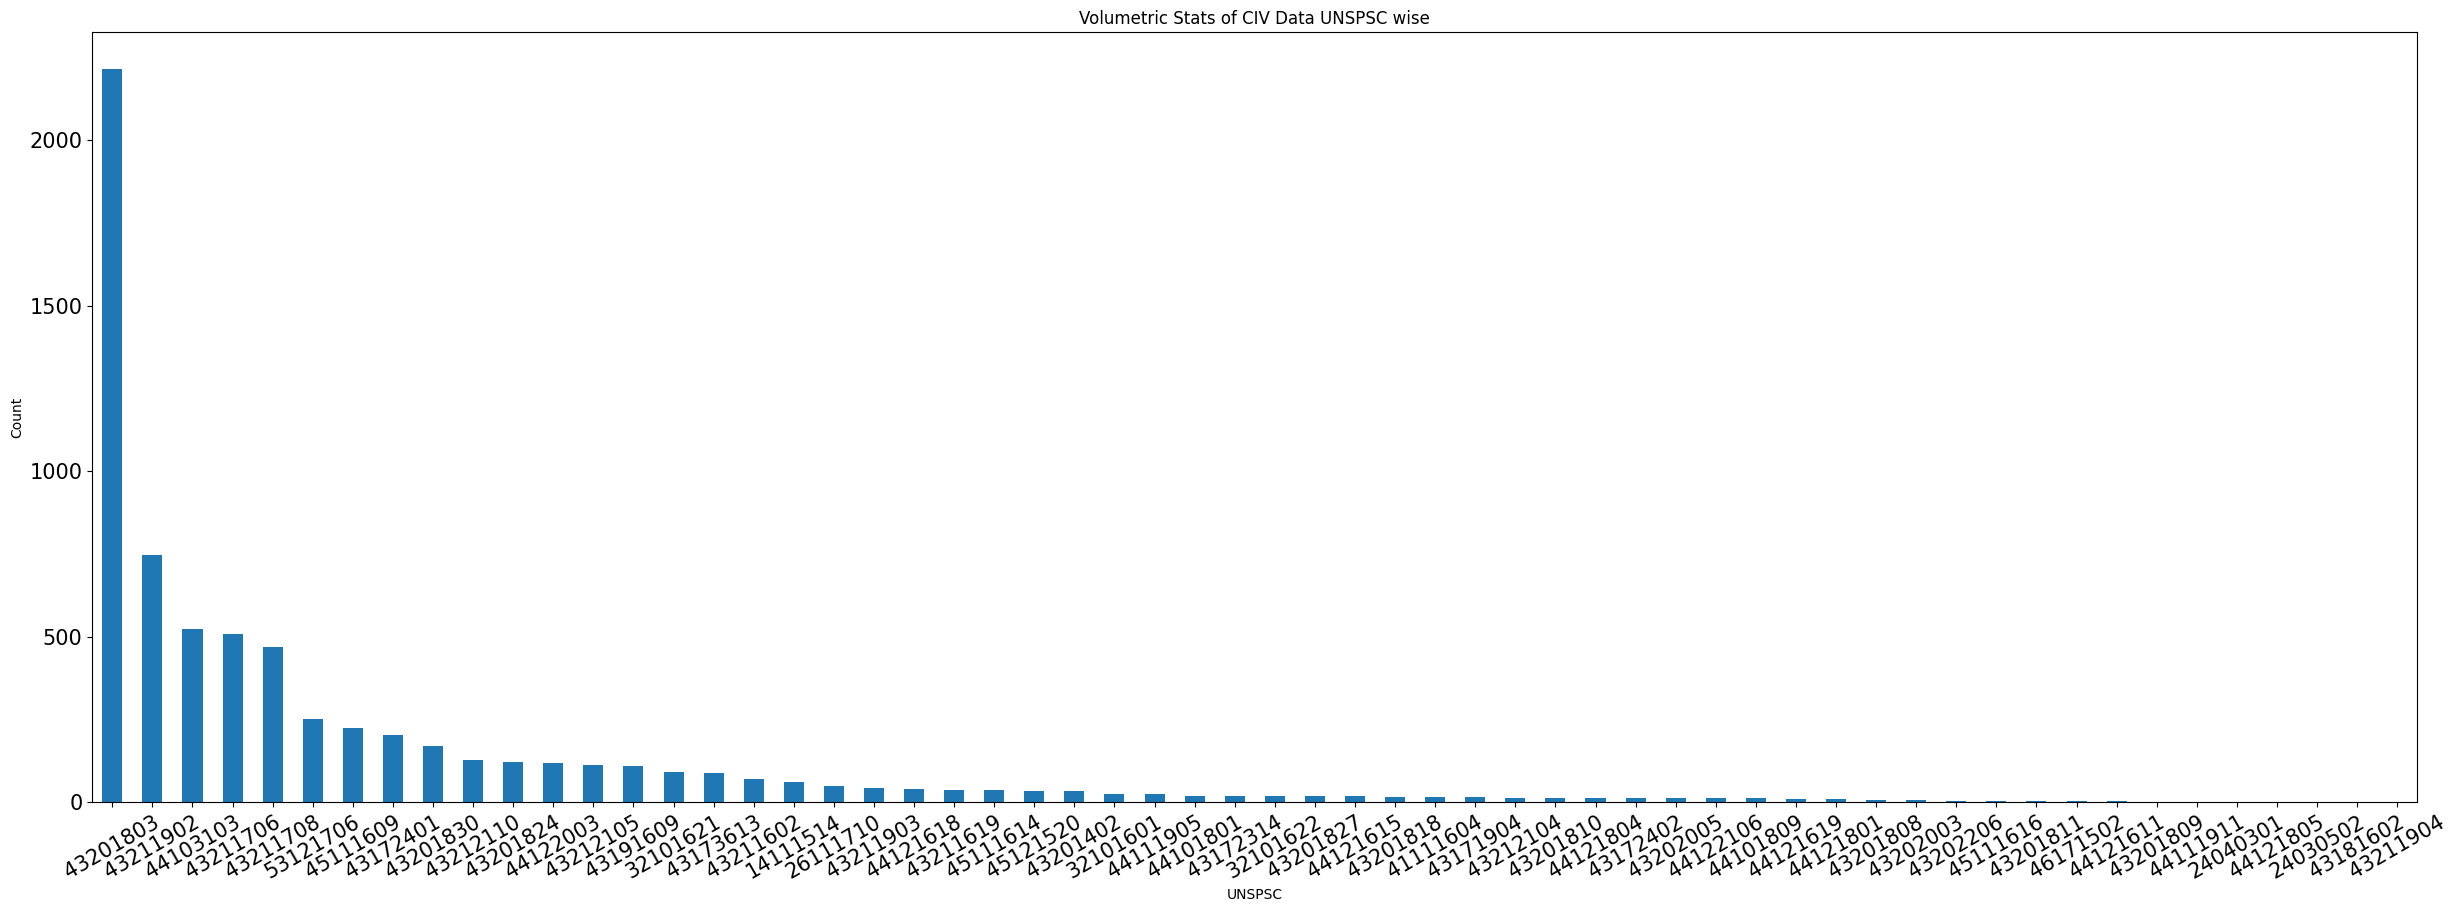

In [53]:
df = CIV_Data['UNSPSC'].value_counts()
df.plot(kind='bar', title='Volumetric Stats of CIV Data UNSPSC wise', ylabel='Count',
         xlabel='UNSPSC',fontsize=15, figsize=(30, 10))
plt.xticks(rotation=30)

# 11) Match the Ontology schema catalog with CIV Data Joined UNSPSC wise

## a) 43201803

In [54]:
# Filter the attribute names UNSPSC wise on the ontology schema catalog
a = df_ontology_schema_catalog[df_ontology_schema_catalog['UNSPSC']==43201803]
a ['/Ontology Schema Primary Spec/Attributename']

1706                  Storage Capacity
1709                SSD Cache Capacity
1712                Platform Supported
1715               Encryption Standard
1718                       Disk Format
1721                    RDX Technology
1724              Recording Technology
1727        Maximum Read Transfer Rate
1730       Maximum Write Transfer Rate
1733                   Random 4KB Read
1736                  Random 4KB Write
1739               Spindle Speed (rpm)
1742                            Buffer
1745                  Endurance (DWPD)
1748                   Endurance (TBW)
1751                    Endurance Type
1754               Ethernet Technology
1757                      Wireless LAN
1760                    Host Interface
1763                   Drive Interface
1766          Drive Interface Standard
1769                  Built-in Devices
1772                            Rugged
1775                      Color Family
1778                             Color
1781                     

In [55]:
# store the column values of attribute names into the list
rowvalues = a['/Ontology Schema Primary Spec/Attributename'].tolist()
rowvalues

['Storage Capacity',
 'SSD Cache Capacity',
 'Platform Supported',
 'Encryption Standard',
 'Disk Format',
 'RDX Technology',
 'Recording Technology',
 'Maximum Read Transfer Rate',
 'Maximum Write Transfer Rate',
 'Random 4KB Read',
 'Random 4KB Write',
 'Spindle Speed (rpm)',
 'Buffer',
 'Endurance (DWPD)',
 'Endurance (TBW)',
 'Endurance Type',
 'Ethernet Technology',
 'Wireless LAN',
 'Host Interface',
 'Drive Interface',
 'Drive Interface Standard',
 'Built-in Devices',
 'Rugged',
 'Color Family',
 'Color',
 'Drive Type',
 'External Drive Type',
 'Form Factor',
 'Drive Carrier',
 'Drive Carrier Width',
 'Hot Swappable',
 'Hot Pluggable',
 'Durability',
 'Height',
 'Width',
 'Depth',
 'Length',
 'Weight (Approximate)',
 'Device Supported',
 'Compatibility',
 'Operating System Compatibility',
 'Post-consumer-waste%',
 'Assembly Required',
 'Energy Star',
 'TCO Certified']

In [56]:
# Check for the column names present in the Ontology schema catalog with CIV Data
b= CIV_Data[CIV_Data['UNSPSC']==43201803]
b.head()

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS001
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS002
36,10838106,IBM Corporation,39M4526,http://www.ibm.com,IBM,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS001
42,10799812,IBM Corporation,39M4508,http://www.ibm.com,IBM,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS001
127,10473090,HP Inc.,PV943A,http://www.hp.com,HP,NaN,Serial ATA/300 Internal Hard Drive,"<p>As an HP Qualified Option, HP drives are de...",NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS002


In [57]:
### Select the fixed columns of UNSPSC and the columns from Ontology Schema Catalog file
# Generating the new dataframe from the secondary specs
req_columns = ['Manufacturer','Manufacturer Part Number','Product Name','Marketing Information',\
                     'Country of Origin','UNSPSC','UPC','EAN','Description','Short Description',\
                     'Technical Description','Keywords']
columns = req_columns.copy()
columns.extend(rowvalues)
columns.remove('Color')
columns.remove('Color Family')
print(columns)
b[columns].head()

['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords', 'Storage Capacity', 'SSD Cache Capacity', 'Platform Supported', 'Encryption Standard', 'Disk Format', 'RDX Technology', 'Recording Technology', 'Maximum Read Transfer Rate', 'Maximum Write Transfer Rate', 'Random 4KB Read', 'Random 4KB Write', 'Spindle Speed (rpm)', 'Buffer', 'Endurance (DWPD)', 'Endurance (TBW)', 'Endurance Type', 'Ethernet Technology', 'Wireless LAN', 'Host Interface', 'Drive Interface', 'Drive Interface Standard', 'Built-in Devices', 'Rugged', 'Drive Type', 'External Drive Type', 'Form Factor', 'Drive Carrier', 'Drive Carrier Width', 'Hot Swappable', 'Hot Pluggable', 'Durability', 'Height', 'Width', 'Depth', 'Length', 'Weight (Approximate)', 'Device Supported', 'Compatibility', 'Operating System Compatibility', 'Post-consumer-waste%', 'Assembly Required', 'Energy St

,Manufacturer,Manufacturer Part Number,Product Name,Marketing Information,Country of Origin,UNSPSC,UPC,EAN,Description,Short Description,...,Depth,Length,Weight (Approximate),Device Supported,Compatibility,Operating System Compatibility,Post-consumer-waste%,Assembly Required,Energy Star,TCO Certified
1,Lenovo Group Limited,39M4508,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,8.291600e+11,8.291600e+11,Lenovo 250 GB Hard Drive - Internal - SATA (SA...,Lenovo 250 GB Hard Drive - Internal - SATA (SA...,...,NaN,NaN,NaN,Server,<ul><li>IBM eserver xSeries 100</li><li>IBM es...,NaN,NaN,NaN,NaN,NaN
2,Lenovo Group Limited,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,43201803,4.359105e+08,4.359105e+08,"Lenovo 39M4530 500 GB Hard Drive - 3.5"" Intern...","Lenovo 39M4530 500 GB Hard Drive - 3.5"" Intern...",...,4.4 Inch|4.4|Inch,NaN,8 oz|8|oz,Server,<ul><li>IBM eServer BladeCenter T 8720</li><li...,NaN,NaN,NaN,NaN,NaN
36,IBM Corporation,39M4526,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,4.358211e+08,7.427458e+12,IBM 250 GB Hard Drive - Internal - SATA (SATA/...,IBM 250 GB Hard Drive - Internal - SATA (SATA/...,...,NaN,NaN,NaN,Server~ Workstation,<ul><li>IBM eServer x306m (8849/8491)</li><li>...,NaN,NaN,NaN,NaN,NaN
42,IBM Corporation,39M4508,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,4.358209e+08,7.129515e+11,IBM 250 GB Hard Drive - Internal - SATA (SATA/...,IBM 250 GB Hard Drive - Internal - SATA (SATA/...,...,NaN,NaN,NaN,Server,<ul><li>IBM eserver xSeries 100</li><li>IBM es...,NaN,NaN,NaN,NaN,NaN
127,HP Inc.,PV943A,Serial ATA/300 Internal Hard Drive,"<p>As an HP Qualified Option, HP drives are de...",NaN,43201803,8.827802e+11,8.827802e+11,"HP 500 GB Hard Drive - 3.5"" Internal - SATA (S...","HP 500 GB Hard Drive - 3.5"" Internal - SATA (S...",...,NaN,NaN,NaN,Workstation,<p><b>HP Workstations:</b></p><ul><li>xw4300</...,NaN,NaN,NaN,NaN,NaN


In [58]:
print(b.shape)
print(b.size)

(2216, 1297)
2874152


In [59]:
## Save the results of the UNSPSC wise dataframe to an excel file
unspsc_data_path=r'D:\IBM_B2B_C_Onboarding\CIV_Training_Data_from_GfK\UNSPSC_Data_Files'
path = os.path.join(unspsc_data_path,"UNSPSC_{}.xlsx".format(43201803))
# Save the dataframes in separate excel file for each UNSPSC
b = b[columns]
b.to_excel(path,index=True)

## b) 43211902

In [60]:
# Filter the attribute names UNSPSC wise on the ontology schema catalog
a1 = df_ontology_schema_catalog[df_ontology_schema_catalog['UNSPSC']==43211902]
a1 ['/Ontology Schema Primary Spec/Attributename']

1389                  Number of Screens
1392                  Screen Size Class
1395               Viewable Screen Size
1398                        Screen Mode
1401                   Panel Technology
                     ...               
1671    Weight with Stand (Approximate)
1674               Post-consumer-waste%
1677                  Assembly Required
1680                        Energy Star
1683                      TCO Certified
Name: /Ontology Schema Primary Spec/Attributename, Length: 99, dtype: object

In [61]:
# store the column values of attribute names into the list
rowvalues1 = a1['/Ontology Schema Primary Spec/Attributename'].tolist()
rowvalues1

['Number of Screens',
 'Screen Size Class',
 'Viewable Screen Size',
 'Screen Mode',
 'Panel Technology',
 'Response Time',
 'Response Time Details',
 'Aspect Ratio',
 'Pixel Pitch',
 'Horizontal Viewing Angle',
 'Vertical Viewing Angle',
 'Mount Type',
 'HDCP Supported',
 'Backlight Technology',
 '3D Type',
 'Features',
 'Horizontal Frequency',
 'Vertical Frequency',
 'Curved Screen',
 'Stand Adjustments',
 'Stand Included',
 'Adjustable Stand Height',
 'Maximum Resolution',
 'Standard Refresh Rate',
 'Color Supported',
 'Contrast Ratio',
 'Native Contrast Ratio',
 'Dynamic Contrast Ratio',
 'Brightness',
 'Tearing Prevention Technology',
 'Color Gamut',
 'Number of Speakers',
 'Speakers',
 'Wireless LAN',
 'Wireless LAN Standard',
 'Bluetooth',
 'Bluetooth Standard',
 'Network (RJ-45)',
 'DVI',
 'HDMI',
 'Micro HDMI',
 'USB',
 'VGA',
 'DisplayPort',
 'Mini DisplayPort',
 'Thunderbolt',
 'USB Type-C',
 'Number of HDMI Outputs',
 'Number of HDMI Inputs',
 'Number of DisplayPorts',
 'Nu

In [62]:
# Check for the column names present in the Ontology schema catalog with CIV Data
b1 = CIV_Data[CIV_Data['UNSPSC']==43211902]
b1

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
179,11940128,"Elo Touch Solutions, Inc",E266835,http://www.elotouch.com,Elo,1915L,1000 Series 1915L Touch Screen Monitor,"<p>The 1915L touchmonitor is designed, develop...",NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS001
830,1014395270,Leyard,997-5956-00,http://www.planar.com,Planar,PLL1920M,PLL1920M LCD Monitor,<p>The Planar PLL1920M LED LCD monitor feature...,NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS001
914,1015462806,"Elo Touch Solutions, Inc",E607940,http://www.elotouch.com,Elo,1739L,1739L Open-frame Touchscreen LCD Monitor,<p>Elo chassis LCD monitor have a long-lasting...,NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS001
955,1016558574,"Elo Touch Solutions, Inc",E719160,http://www.elotouch.com,Elo,1715L,1715L Touchscreen LCD Monitor,"<p>The 1715L touchmonitor is designed, develop...",NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS001
961,1016085659,"Elo Touch Solutions, Inc",E603162,http://www.elotouch.com,Elo,1715L,1715L Touchscreen LCD Monitor,"<p>The 1715L touchmonitor is designed, develop...",NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,1068458004,ASUS Computer International,VG245Q,http://usa.asus.com,Asus,VG245Q,VG245Q Widescreen LCD Monitor,<p><b>ASUS VG245Q Console Gaming Monitor - 24i...,CN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS004
6809,1068449546,Philips Electronics,241B7QPTEB/00,http://www.usa.philips.com,Philips,241B7QPTEB,LCD Monitor with PowerSensor,"<p><b>Crisp views, efficient performance</b></...",NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS003
6814,1068457890,ASUS Computer International,VB199T,http://usa.asus.com,Asus,VB199T,VB199T LCD Monitor,<b>True-to-life Pictures Powered by LED</b><p>...,CN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS001
6824,1068450664,Philips Electronics,65BDL4050D/00,http://www.usa.philips.com,Philips,65BDL4050D,Signage Solutions D-Line Display,<b>Chasing innovation</b><br /><b><br />powere...,NaN,43211902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONITOR_CLASS006


In [63]:
### Select the fixed columns of UNSPSC and the columns from Ontology Schema Catalog file
# Generating the new dataframe from the secondary specs
columns1 = req_columns.copy()
columns1.extend(rowvalues1)
columns1.remove('Response Time Details')
list_removal =['Micro HDMI', 'Number of USB 2.0 Upstream Ports', 'Number of USB 2.0 Downstream Ports', 'Number of USB Type-C 3.2 Gen 1 Ports', 'Number of USB 3.2 Downstream Ports', 'Number of USB Type-B Upstream Ports', 'Number of USB Type-C Ports', 'Energy Efficiency Class _SDR_ _from 1st March 2021_', 'Energy Efficiency Class _HDR_ _from 1st March 2021_', 'ON Mode Energy Consumption per 1000Hour _SDR_ _from 1st March 2021_', 'ON Mode Energy Consumption per 1000Hour _HDR_ _from 1st March 2021_', 'Operating Power Consumption _till 28th February 2021_', 'Energy Consumption per Year _till 28th February 2021_', 'Standby Power Consumption _till 28th February 2021_', 'Off-Mode Power Consumption _till 28th February 2021_', 'Color Family', 'Color']
for i in list_removal:
    columns1.remove(i)
print(columns1)
b1[columns1].head()

['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords', 'Number of Screens', 'Screen Size Class', 'Viewable Screen Size', 'Screen Mode', 'Panel Technology', 'Response Time', 'Aspect Ratio', 'Pixel Pitch', 'Horizontal Viewing Angle', 'Vertical Viewing Angle', 'Mount Type', 'HDCP Supported', 'Backlight Technology', '3D Type', 'Features', 'Horizontal Frequency', 'Vertical Frequency', 'Curved Screen', 'Stand Adjustments', 'Stand Included', 'Adjustable Stand Height', 'Maximum Resolution', 'Standard Refresh Rate', 'Color Supported', 'Contrast Ratio', 'Native Contrast Ratio', 'Dynamic Contrast Ratio', 'Brightness', 'Tearing Prevention Technology', 'Color Gamut', 'Number of Speakers', 'Speakers', 'Wireless LAN', 'Wireless LAN Standard', 'Bluetooth', 'Bluetooth Standard', 'Network (RJ-45)', 'DVI', 'HDMI', 'USB', 'VGA', 'DisplayPort', 'Mini DisplayPo

,Manufacturer,Manufacturer Part Number,Product Name,Marketing Information,Country of Origin,UNSPSC,UPC,EAN,Description,Short Description,...,Depth,Height with Stand,Width with Stand,Depth with Stand,Weight (Approximate),Weight with Stand (Approximate),Post-consumer-waste%,Assembly Required,Energy Star,TCO Certified
179,"Elo Touch Solutions, Inc",E266835,1000 Series 1915L Touch Screen Monitor,"<p>The 1915L touchmonitor is designed, develop...",NaN,43211902,7.411493e+11,7.682012e+11,Elo 1000 Series 1915L Touch Screen Monitor - 1...,Elo 1000 Series 1915L Touch Screen Monitor,...,8.2 Inch|8.2|Inch,NaN,NaN,NaN,17.42 lb|17.42|lb,NaN,NaN,NaN,NaN,NaN
830,Leyard,997-5956-00,PLL1920M LCD Monitor,<p>The Planar PLL1920M LED LCD monitor feature...,NaN,43211902,8.106891e+11,8.106891e+11,"Planar PLL1920M 19"" SXGA Edge LED LCD Monitor ...","Planar PLL1920M 19"" SXGA Edge LED LCD Monitor ...",...,2.8 Inch|2.8|Inch,16.98 Inch|16.98|Inch,16.01 Inch|16.01|Inch,7.89 Inch|7.89|Inch,7.50 lb|7.50|lb,10.08 lb|10.08|lb,NaN,NaN,NaN,NaN
914,"Elo Touch Solutions, Inc",E607940,1739L Open-frame Touchscreen LCD Monitor,<p>Elo chassis LCD monitor have a long-lasting...,NaN,43211902,7.358581e+11,7.358581e+11,"Elo 1739L 17"" Open-frame LCD Touchscreen Monit...","Elo 1739L 17"" Open-frame LCD Touchscreen Monit...",...,1.9 Inch|1.9|Inch,NaN,NaN,NaN,8.80 lb|8.80|lb,NaN,NaN,NaN,NaN,NaN
955,"Elo Touch Solutions, Inc",E719160,1715L Touchscreen LCD Monitor,"<p>The 1715L touchmonitor is designed, develop...",NaN,43211902,7.411493e+11,5.711045e+12,"Elo 1715L Touchscreen LCD Monitor - 17"" - Surf...",Elo 1715L Touchscreen LCD Monitor,...,NaN,14.40 Inch|14.40|Inch,15.40 Inch|15.40|Inch,8 Inch|8|Inch,15.20 lb|15.20|lb,NaN,NaN,NaN,NaN,NaN
961,"Elo Touch Solutions, Inc",E603162,1715L Touchscreen LCD Monitor,"<p>The 1715L touchmonitor is designed, develop...",NaN,43211902,1.221418e+09,7.411493e+11,"Elo 1715L Touchscreen LCD Monitor - 17"" - 5-wi...",Elo 1715L Touchscreen LCD Monitor,...,8 Inch|8|Inch,NaN,NaN,NaN,15.20 lb|15.20|lb,NaN,NaN,NaN,NaN,NaN


In [64]:
print(b1.shape)
print(b1.size)

(748, 1297)
970156


In [65]:
## Save the results of the UNSPSC wise dataframe to an excel file
path1 = os.path.join(unspsc_data_path,"UNSPSC_{}.xlsx".format(43211902))
# Save the dataframes in separate excel file for each UNSPSC
b1 = b1[columns1]
b1.to_excel(path1,index=True)

## c) 44103103

In [66]:
# Filter the attribute names UNSPSC wise on the ontology schema catalog
a2 = df_ontology_schema_catalog[df_ontology_schema_catalog['UNSPSC']==44103103]
a2 ['/Ontology Schema Primary Spec/Attributename']

4830                          Packing
4841                 Number of Pieces
4852                 Print Technology
4863                      Print Color
4874                       Yield Type
4885              Typical Print Yield
4896                       Ink Volume
4907                             MICR
4918                           Height
4929                            Width
4940                            Depth
4951             Weight (Approximate)
4962          Compatible to OEM Brand
4973    Compatible to OEM Part Number
4984          Compatible to OEM Model
4995                    Compatibility
5006             Post-consumer-waste%
5017                      Energy Star
Name: /Ontology Schema Primary Spec/Attributename, dtype: object

In [67]:
# store the column values of attribute names into the list
rowvalues2 = a2['/Ontology Schema Primary Spec/Attributename'].tolist()
rowvalues2

['Packing',
 'Number of Pieces',
 'Print Technology',
 'Print Color',
 'Yield Type',
 'Typical Print Yield',
 'Ink Volume',
 'MICR',
 'Height',
 'Width',
 'Depth',
 'Weight (Approximate)',
 'Compatible to OEM Brand',
 'Compatible to OEM Part Number',
 'Compatible to OEM Model',
 'Compatibility',
 'Post-consumer-waste%',
 'Energy Star']

In [68]:
# Check for the column names present in the Ontology schema catalog with CIV Data
b2 = CIV_Data[CIV_Data['UNSPSC']==44103103]
b2

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS353
3,11728466,"Lexmark International, Inc",C500H2CG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
4,11726120,"Lexmark International, Inc",C500H2YG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
6,11720188,"Lexmark International, Inc",C500S2KG,http://www.lexmark.com,Lexmark,NaN,C500S2CG/KG/MG/YG Toner Cartridges,<p>Toner cartridge is designed for use with Le...,JP,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS601
7,11745466,"Lexmark International, Inc",12A8420,http://www.lexmark.com,Lexmark,NaN,12A8420/25 Toner Cartridges,<p>Return Program print cartridge is designed ...,US,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,1055385855,Dell Technologies,595-10009,http://www.delltechnologies.com,Dell,595-10009,High Capacity Toner Cartridge,<p>The high capacity black toner cartridge fro...,NaN,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS194
5634,1054603281,Dell Technologies,593-10121,http://www.delltechnologies.com,Dell,593-10121,High Capacity Toner Cartridge,<p>The High Capacity Black Toner Cartridge fro...,NaN,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS192
5649,1055373695,Samsung,CLT-M4072S/ELS,http://www.samsung.com/us,Samsung,CLT-M4072S,CLT-M4072S Toner Cartridge,"<p>Form Toner to Paper Trays, genuine Samsung ...",NaN,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS735
5769,1067091460,"Canon, Inc",0628B002AA,http://www.usa.canon.com,Canon,NaN,PG-I5BK Black Ink Cartridge,"<p>Genuine Canon inks, toner, and paper provid...",NaN,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS162


In [69]:
### Select the fixed columns of UNSPSC and the columns from Ontology Schema Catalog file
# Generating the new dataframe from the secondary specs
columns2 = req_columns.copy()
columns2.extend(rowvalues2)
columns2.remove('Number of Pieces')
print(columns2)
b2[columns2].head()

['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords', 'Packing', 'Print Technology', 'Print Color', 'Yield Type', 'Typical Print Yield', 'Ink Volume', 'MICR', 'Height', 'Width', 'Depth', 'Weight (Approximate)', 'Compatible to OEM Brand', 'Compatible to OEM Part Number', 'Compatible to OEM Model', 'Compatibility', 'Post-consumer-waste%', 'Energy Star']


,Manufacturer,Manufacturer Part Number,Product Name,Marketing Information,Country of Origin,UNSPSC,UPC,EAN,Description,Short Description,...,Height,Width,Depth,Weight (Approximate),Compatible to OEM Brand,Compatible to OEM Part Number,Compatible to OEM Model,Compatibility,Post-consumer-waste%,Energy Star
0,HP Inc.,Q7516A,16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,44103103,8.291608e+11,8.291608e+11,HP 16A (Q7516A) Original Laser Toner Cartridge...,HP 16A (Q7516A) Original Laser Toner Cartridge...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><b>HP LaserJet Printers:</b></p><ul><li>520...,4 Percentage|4|Percentage,NaN
3,"Lexmark International, Inc",C500H2CG,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,7.346460e+11,7.346460e+11,Lexmark Original Toner Cartridge - Laser - 300...,Lexmark Original Toner Cartridge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><b>Lexmark Printers:</b></p><ul><li>C500</l...,NaN,NaN
4,"Lexmark International, Inc",C500H2YG,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,7.346460e+11,7.346460e+11,Lexmark Toner Cartridge - Laser - High Yield -...,Lexmark Toner Cartridge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><b>Lexmark Printers:</b></p><ul><li>C500</l...,NaN,NaN
6,"Lexmark International, Inc",C500S2KG,C500S2CG/KG/MG/YG Toner Cartridges,<p>Toner cartridge is designed for use with Le...,JP,44103103,7.346460e+11,7.346460e+11,Lexmark Original Toner Cartridge - Laser - 250...,Lexmark Original Toner Cartridge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><b>Lexmark Printers:</b></p><ul><li>C500</l...,0%,NaN
7,"Lexmark International, Inc",12A8420,12A8420/25 Toner Cartridges,<p>Return Program print cartridge is designed ...,US,44103103,7.346460e+11,5.055345e+12,Lexmark Toner Cartridge - Laser - Standard Yie...,Lexmark Toner Cartridge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Lexmark T430 Printer</p>,NaN,NaN


In [70]:
print(b2.shape)
print(b2.size)

(524, 1297)
679628


In [71]:
## Save the results of the UNSPSC wise dataframe to an excel file
path2 = os.path.join(unspsc_data_path,"UNSPSC_{}.xlsx".format(44103103))
# Save the dataframes in separate excel file for each UNSPSC
b2 = b2[columns2]
b2.to_excel(path2,index=True)

## d) 43211706

In [72]:
# Filter the attribute names UNSPSC wise on the ontology schema catalog
a3 = df_ontology_schema_catalog[df_ontology_schema_catalog['UNSPSC']==43211706]
a3 ['/Ontology Schema Primary Spec/Attributename']

5647                           Keyswitch Technology
5648        Keyboard/Keypad Connectivity Technology
5649            Keyboard/Keypad Wireless Technology
5650    Keyboard/Keypad Wireless Operating Distance
5651                   Wireless Operating Frequency
5652                                 Number of Keys
5653                             Number of Hot Keys
5654                                       Hot Keys
5655                                    Keys Layout
5656                                   Localization
5657                                      Backlight
5658                                 Backlight Type
5659                                      Bluetooth
5660                 Printed Design/Pattern/Texture
5661                       Keyboard/Keypad Features
5662                           Pointing Device Type
5663                 Keyboard/Keypad Host Interface
5664                    Wireless Receiver Interface
5665                               Battery Included
5666        

In [73]:
# store the column values of attribute names into the list
rowvalues3 = a3['/Ontology Schema Primary Spec/Attributename'].tolist()
rowvalues3

['Keyswitch Technology',
 'Keyboard/Keypad Connectivity Technology',
 'Keyboard/Keypad Wireless Technology',
 'Keyboard/Keypad Wireless Operating Distance',
 'Wireless Operating Frequency',
 'Number of Keys',
 'Number of Hot Keys',
 'Hot Keys',
 'Keys Layout',
 'Localization',
 'Backlight',
 'Backlight Type',
 'Bluetooth',
 'Printed Design/Pattern/Texture',
 'Keyboard/Keypad Features',
 'Pointing Device Type',
 'Keyboard/Keypad Host Interface',
 'Wireless Receiver Interface',
 'Battery Included',
 'Number of Batteries Supported',
 'Battery Size Supported',
 'Rugged',
 'Color Family',
 'Color',
 'Keyboard/Keypad Height',
 'Keyboard/Keypad Width',
 'Keyboard/Keypad Depth',
 'Weight (Approximate)',
 'Platform Supported',
 'Brand Compatibility',
 'Device Supported',
 'Operating System Compatibility',
 'Post-consumer-waste%',
 'Assembly Required',
 'Energy Star']

In [74]:
# Check for the column names present in the Ontology schema catalog with CIV Data
b3 = CIV_Data[CIV_Data['UNSPSC']==43211706]
b3

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
18,11494737,Targus Group International,BUS0067,http://www.targus.com,Targus,BUS0067,Corporate USB Wired Keyboard & Mouse Bundle,<p>The Targus Corporate USB Wired Keyboard and...,KH,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_MOUSE_COMBO_WIRED_CLASS005
19,11647536,Lenovo Group Limited,73P2627,http://www.lenovo.com/us/en/,Lenovo,NaN,Enhanced Performance Keyboard,<p>The Enhanced Performance USB Keyboard combi...,NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_WIRED_CLASS002
32,11422201,"Fellowes, Inc.",9892901,http://www.fellowes.com,Fellowes,9892901,Microban Basic 104 Keyboard,<p>Basic 104 keyboard features USB connectivit...,CN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_WIRED_CLASS002
37,10987734,Lenovo Group Limited,73P5247,http://www.lenovo.com/us/en/,Lenovo,NaN,Preferred Pro USB Keyboard,<p>The ThinkPad and ThinkCentre high-quality k...,NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_WIRED_CLASS002
40,10983419,Lenovo Group Limited,73P5228,http://www.lenovo.com/us/en/,Lenovo,NaN,Preferred Pro USB Keyboard,NaN,NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_WIRED_CLASS002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,1068452538,Microsoft Corporation,APB-00006,http://www.microsoft.com,Microsoft,600,Wired Desktop 600,<p><b>Great value in a sleek desktop</b></p> <...,NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_MOUSE_COMBO_WIRED_CLASS005
6669,1068452116,Logitech,920-002437,http://www.logitech.com,Logitech,MK710,Wireless Desktop MK710 Keyboard and Mouse,<p>The Logitech Wireless Desktop MK710. Where ...,NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_MOUSE_COMBO_WIRELESS_CLASS006
6743,1068452121,Logitech,920-002543,http://www.logitech.com,Logitech,MK120,MK120 Keyboard and Mouse,"<p>You can say goodbye to your boring, bulky k...",NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_MOUSE_COMBO_WIRED_CLASS005
6770,1068452148,Logitech,920-006708,http://www.logitech.com,Logitech,NaN,"Keys-To-Go Ultra-portable, Stand-alone Keyboard","<b>Keys-To-Go, the super slender, uber handy, ...",NaN,43211706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEYBOARD_BT_CLASS008


In [75]:
### Select the fixed columns of UNSPSC and the columns from Ontology Schema Catalog file
# Generating the new dataframe from the secondary specs
columns3 = req_columns.copy()
columns3.extend(rowvalues3)
list_removal =['Number of Hot Keys', 'Backlight Type','Color Family', 'Color']
for i in list_removal:
    columns3.remove(i)
print(columns3)
b3[columns3].head()

['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords', 'Keyswitch Technology', 'Keyboard/Keypad Connectivity Technology', 'Keyboard/Keypad Wireless Technology', 'Keyboard/Keypad Wireless Operating Distance', 'Wireless Operating Frequency', 'Number of Keys', 'Hot Keys', 'Keys Layout', 'Localization', 'Backlight', 'Bluetooth', 'Printed Design/Pattern/Texture', 'Keyboard/Keypad Features', 'Pointing Device Type', 'Keyboard/Keypad Host Interface', 'Wireless Receiver Interface', 'Battery Included', 'Number of Batteries Supported', 'Battery Size Supported', 'Rugged', 'Keyboard/Keypad Height', 'Keyboard/Keypad Width', 'Keyboard/Keypad Depth', 'Weight (Approximate)', 'Platform Supported', 'Brand Compatibility', 'Device Supported', 'Operating System Compatibility', 'Post-consumer-waste%', 'Assembly Required', 'Energy Star']


,Manufacturer,Manufacturer Part Number,Product Name,Marketing Information,Country of Origin,UNSPSC,UPC,EAN,Description,Short Description,...,Keyboard/Keypad Width,Keyboard/Keypad Depth,Weight (Approximate),Platform Supported,Brand Compatibility,Device Supported,Operating System Compatibility,Post-consumer-waste%,Assembly Required,Energy Star
18,Targus Group International,BUS0067,Corporate USB Wired Keyboard & Mouse Bundle,<p>The Targus Corporate USB Wired Keyboard and...,KH,43211706,9.263622e+10,9.263622e+10,Targus BUS0067 Corporate HID Keyboard and Mous...,Targus BUS0067 Corporate HID Keyboard and Mouse,...,18 Inch|18|Inch,6.50 Inch|6.50|Inch,NaN,PC~ Mac,NaN,Computer,Windows 10~ Windows 8.1~ Windows 8~ Windows 7~...,NaN,NaN,NaN
19,Lenovo Group Limited,73P2627,Enhanced Performance Keyboard,<p>The Enhanced Performance USB Keyboard combi...,NaN,43211706,4.351965e+08,5.050689e+12,Lenovo Enhanced Performance Keyboard - USB - Q...,Lenovo Enhanced Performance Keyboard,...,18.30 Inch|18.30|Inch,7.90 Inch|7.90|Inch,2.80 lb|2.80|lb,PC,NaN,Computer,NaN,NaN,NaN,NaN
32,"Fellowes, Inc.",9892901,Microban Basic 104 Keyboard,<p>Basic 104 keyboard features USB connectivit...,CN,43211706,4.385950e+10,4.385950e+11,Microban&reg; Basic 104 Keyboard - Cable Conne...,Microban&reg; Basic 104 Keyboard,...,18.75 Inch|18.75|Inch,6.50 Inch|6.50|Inch,1.65 lb|1.65|lb,PC,NaN,Computer,NaN,NaN,No,NaN
37,Lenovo Group Limited,73P5247,Preferred Pro USB Keyboard,<p>The ThinkPad and ThinkCentre high-quality k...,NaN,43211706,6.457438e+11,5.050690e+12,Lenovo Preferred Pro USB Keyboard - USB - 105 ...,Lenovo Preferred Pro USB Keyboard,...,17.83 Inch|17.83|Inch,7.28 Inch|7.28|Inch,2.80 lb|2.80|lb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Lenovo Group Limited,73P5228,Preferred Pro USB Keyboard,NaN,NaN,43211706,6.457438e+11,5.050690e+12,Lenovo Preferred Pro USB Keyboard - USB - Black,Lenovo Preferred Pro USB Keyboard,...,NaN,NaN,NaN,PC,NaN,Computer,NaN,NaN,NaN,NaN


In [76]:
print(b3.shape)
print(b3.size)

(508, 1297)
658876


In [77]:
## Save the results of the UNSPSC wise dataframe to an excel file
path3 = os.path.join(unspsc_data_path,"UNSPSC_{}.xlsx".format(43211706))
# Save the dataframes in separate excel file for each UNSPSC
b3 = b3[columns3]
b3.to_excel(path3,index=True)

## e) 43211708

In [78]:
# Filter the attribute names UNSPSC wise on the ontology schema catalog
a4 = df_ontology_schema_catalog[df_ontology_schema_catalog['UNSPSC']==43211708]
# store the column values of attribute names into the list
rowvalues4 = a4['/Ontology Schema Primary Spec/Attributename'].tolist()
rowvalues4
# Check for the column names present in the Ontology schema catalog with CIV Data
b4 = CIV_Data[CIV_Data['UNSPSC']==43211708]
### Select the fixed columns of UNSPSC and the columns from Ontology Schema Catalog file
# Generating the new dataframe from the secondary specs
columns4 = req_columns.copy()
columns4.extend(rowvalues4)
list_removal =['Hand or Palm Size', 'Mouse Size Class', 'Works with Chromebook', 'Rechargeable', 'Color Family', 'Color']
for i in list_removal:
    columns4.remove(i)
print(columns4)
# b4[columns4].head()
print(b4.shape)
print(b4.size)
## Save the results of the UNSPSC wise dataframe to an excel file
path4 = os.path.join(unspsc_data_path,"UNSPSC_{}.xlsx".format(43211708))
# Save the dataframes in separate excel file for each UNSPSC
b4 = b4[columns4]
b4.to_excel(path4,index=True)

['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords', 'Pointing Device Connectivity Technology', 'Pointing Device Wireless Technology', 'Wireless Operating Frequency', 'Movement Detection', 'Movement Resolution (dpi)', 'Number of Total Buttons', 'Number of Programmable Buttons', 'Scroller Type', 'Printed Design/Pattern/Texture', 'Ergonomic Fit', 'Bluetooth', 'Rugged', 'Pointing Device Host Interface', 'Battery Included', 'Height', 'Width', 'Depth', 'Length', 'Weight (Approximate)', 'Device Supported', 'Operating System Compatibility', 'Platform Supported', 'Post-consumer-waste%', 'Assembly Required', 'Energy Star']
(470, 1297)
609590


# 12) Filter the dataframes generated UNSPSC wise  and save each one separately in an excel format

In [79]:
# Storing the UNSPSC values in a list
list_unspsc = CIV_Data['UNSPSC'].unique().tolist()
print(list_unspsc)

[44103103, 43201803, 43212104, 53121706, 43211706, 43201810, 43201824, 43171904, 26111710, 44101801, 43173613, 43201811, 43211708, 43201809, 32101621, 43201808, 44121804, 14111514, 41111604, 44122003, 44121618, 44121611, 44122106, 44121615, 43211902, 44121801, 46171502, 44121619, 43191609, 44111905, 43202003, 43211619, 44101809, 43172314, 43212105, 24040301, 32101601, 43211903, 43172401, 43211602, 43201818, 45121520, 45111609, 43172402, 43201827, 43202005, 32101622, 45111614, 43202206, 45111616, 43201830, 43201402, 43212110, 44121805, 44111911, 24030502, 43181602, 43211904]


In [80]:
CIV_Data.UNSPSC.isin(list_unspsc)
CIV_Data

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS353
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS001
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS002
3,11728466,"Lexmark International, Inc",C500H2CG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
4,11726120,"Lexmark International, Inc",C500H2YG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,1074509780,"Cisco Systems, Inc",UCS-HD18TB10KS4K=,http://www.cisco.com,Cisco,NaN,Hard Drive,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS011
6831,1074508085,"Cisco Systems, Inc",UCS-HD12TB10K12G=,http://www.cisco.com,Cisco,NaN,1.2 TB 12G SAS 10K RPM SFF HDD,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS011
6832,1073421879,Lenovo Group Limited,81Y9691,http://www.lenovo.com/us/en/,Lenovo,NaN,7200 rpm SAS 2.5-inch SFF Slim-Hot-Swap Hard D...,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS010
6833,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,43201830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_SSD_CLASS002


In [81]:
CIV_Data[(CIV_Data.UNSPSC.isin(list_unspsc))]

,ProductID,Manufacturer,Manufacturer Part Number,Manufacturer Website Address,Brand Name,Product Model,Product Name,Marketing Information,Country of Origin,UNSPSC,...,Label Height Supported,Label Width Supported,Photo Printing,Energy Consumption per Year (till 28th February 2021),Off-Mode Power Consumption (till 28th February 2021),Energy Efficiency Class (till 28th February 2021),Frequency (Horizontal/Vertical),Hard Drive Configuration,Fastener Capacity,SPC
0,11740223,HP Inc.,Q7516A,http://www.hp.com,HP,16A (Q7516A),16A (Q7516A) Toner Cartridge,<p>Toner cartridge is designed for use with He...,JP,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS353
1,11811640,Lenovo Group Limited,39M4508,http://www.lenovo.com/us/en/,Lenovo,NaN,Serial ATA/300 Internal Hard Drive,<p>Satisfy midrange to advanced data-storage a...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS001
2,11739730,Lenovo Group Limited,39M4530,http://www.lenovo.com/us/en/,Lenovo,39M4530,Simple Swap Hard Drive,<p>This simple-swap Serial ATA (SATA) hard dis...,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS002
3,11728466,"Lexmark International, Inc",C500H2CG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
4,11726120,"Lexmark International, Inc",C500H2YG,http://www.lexmark.com,Lexmark,NaN,C500H2 Series Toner Cartridges,<p>High-yield toner cartridge is designed for ...,TH,44103103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TONER_INK_CARTRIDGE_CLASS600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,1074509780,"Cisco Systems, Inc",UCS-HD18TB10KS4K=,http://www.cisco.com,Cisco,NaN,Hard Drive,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS011
6831,1074508085,"Cisco Systems, Inc",UCS-HD12TB10K12G=,http://www.cisco.com,Cisco,NaN,1.2 TB 12G SAS 10K RPM SFF HDD,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS011
6832,1073421879,Lenovo Group Limited,81Y9691,http://www.lenovo.com/us/en/,Lenovo,NaN,7200 rpm SAS 2.5-inch SFF Slim-Hot-Swap Hard D...,NaN,NaN,43201803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_HDD_CLASS010
6833,1074504777,"ADATA Technology Co., Ltd",ASX8000NPC-256GM-C,http://www.adata.com/us/,Adata,ASX8000NPC-256GM-C,XPG SX8000 PCIe Gen3x4 M.2 2280 Solid State Drive,<p><b>XPG SX8000 PCIe Gen3x4 M.2 2280 Solid St...,NaN,43201830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERNAL_SSD_CLASS002


In [82]:
# Directory to store the UNSPSCwise excel files
unspsc_data_path=r'D:\IBM_B2B_C_Onboarding\CIV_Training_Data_from_GfK\UNSPSC_Data_Files'

# Generating the new dataframe from the secondary specs
req_columns = ['Manufacturer','Manufacturer Part Number','Product Name','Marketing Information',\
                     'Country of Origin','UNSPSC','UPC','EAN','Description','Short Description',\
                     'Technical Description','Keywords']
for i in list_unspsc:
    a = df_ontology_schema_catalog[df_ontology_schema_catalog['UNSPSC']== i ]
    b = CIV_Data[CIV_Data['UNSPSC']== i ]
    # Convert column names of CIV Data Joined into a list
    columnvalues = b.columns.tolist()
    # print(columnvalues)
    # Convert row values of Ontology Schema Catalog into a list
    rowvalues = a['/Ontology Schema Primary Spec/Attributename'].tolist()
    # print(rowvalues)
    
    # Converting both the lists into sets and find the common values
    common_values = set(columnvalues).intersection(set(rowvalues))
    print("Common Values :", common_values)
    print(req_columns)
    final_column_values = req_columns + list(common_values)
    print("Common Values after including required columns:", final_column_values)
    print(b[final_column_values])
    df_final_UNSPSCwise = b[final_column_values]
    print(df_final_UNSPSCwise.shape)
    print(df_final_UNSPSCwise.size)
    path = os.path.join(unspsc_data_path,"UNSPSC_{}.xlsx".format(i))
    # Save the dataframes in separate excel file for each UNSPSC
    df_final_UNSPSCwise.to_excel(path,index=True)

Common Values : {'MICR', 'Compatible to OEM Brand', 'Yield Type', 'Depth', 'Compatible to OEM Model', 'Compatibility', 'Print Technology', 'Width', 'Height', 'Compatible to OEM Part Number', 'Ink Volume', 'Post-consumer-waste%', 'Print Color', 'Packing', 'Typical Print Yield', 'Weight (Approximate)', 'Energy Star'}
['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords']
Common Values after including required columns: ['Manufacturer', 'Manufacturer Part Number', 'Product Name', 'Marketing Information', 'Country of Origin', 'UNSPSC', 'UPC', 'EAN', 'Description', 'Short Description', 'Technical Description', 'Keywords', 'MICR', 'Compatible to OEM Brand', 'Yield Type', 'Depth', 'Compatible to OEM Model', 'Compatibility', 'Print Technology', 'Width', 'Height', 'Compatible to OEM Part Number', 'Ink Volume', 'Post-consumer-waste%', 'Print Color', 

# ---------------------------------